<a href="https://colab.research.google.com/github/vantainguyen/A-B-Testing/blob/main/Z_test_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://lazyprogrammer.me/course_files/titanic_train.csv

--2022-07-09 00:59:12--  https://lazyprogrammer.me/course_files/titanic_train.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/csv]
Saving to: ‘titanic_train.csv’

titanic_train.csv   100%[===================>]  59.76K  --.-KB/s    in 0.008s  

2022-07-09 00:59:13 (7.30 MB/s) - ‘titanic_train.csv’ saved [61194/61194]



In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest

In [4]:
df = pd.read_csv('titanic_train.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df[df['Survived'] == 1].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
x1 = df[df['Survived'] == 1]['Fare'].dropna().to_numpy()

In [9]:
x2 = df[df['Survived'] == 0]['Fare'].dropna().to_numpy()

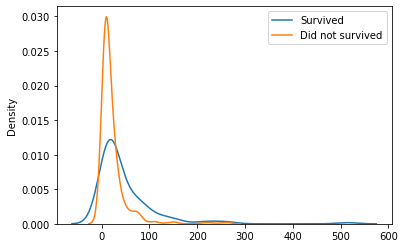

In [10]:
sns.kdeplot(x1, label='Survived')
sns.kdeplot(x2, label='Did not survived')
plt.legend();

In [11]:
x1.mean(), x2.mean()

(48.39540760233918, 22.117886885245902)

In [13]:
ztest(x1, x2)

(7.939191660871055, 2.035031103573989e-15)

# Conclusion: There is sufficient evidence to support that the means of two groups are different